In [1]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})

In [2]:
# read the data in a pandas dataframe
data = pd.read_csv("Cumiliative Rainfall data.csv")  
data.head()

,DATE,ACTUAL RAINFALL (mm)
0,01-07-2018,7.81
1,02-07-2018,11.29
2,03-07-2018,11.73
3,04-07-2018,11.36
4,05-07-2018,9.34


In [3]:
data.tail()

,DATE,ACTUAL RAINFALL (mm)
1092,27-06-2021,9.88
1093,28-06-2021,6.77
1094,29-06-2021,5.00
1095,30-06-2021,6.26
1096,01-07-2021,9.28


In [4]:
data.describe()

,ACTUAL RAINFALL (mm)
count,1097.000000
mean,7.709407
std,9.759295
min,0.000000
25%,0.970000
50%,4.060000
75%,11.460000
max,73.580000


In [5]:
data.shape

(1097, 2)

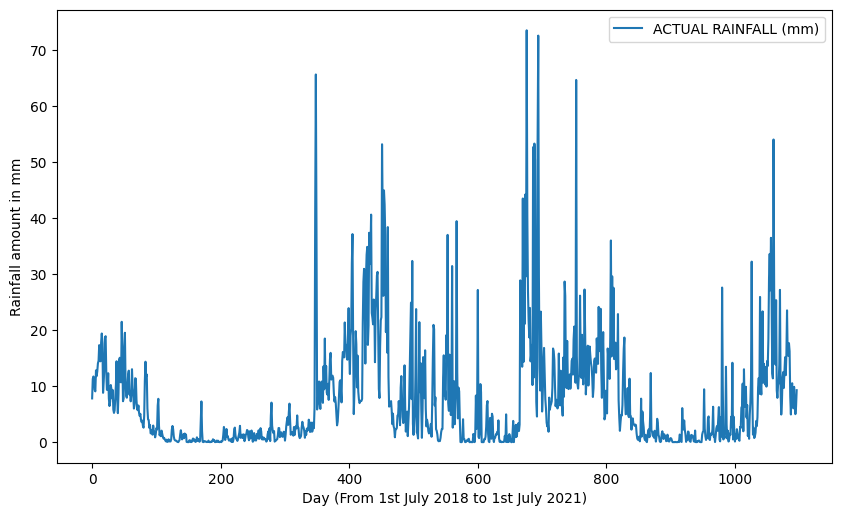

In [6]:
#PLOTTING THE DATA
data.plot()
plt.ylabel('Rainfall amount in mm')
plt.xlabel('Day (From 1st July 2018 to 1st July 2021)')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['ACTUAL RAINFALL (mm)'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.6257892143026185
p-value: 0.005286707846874968
Critical Values:
	1%: -3.436436308605049
	5%: -2.8642273405849363
	10%: -2.568200833956216


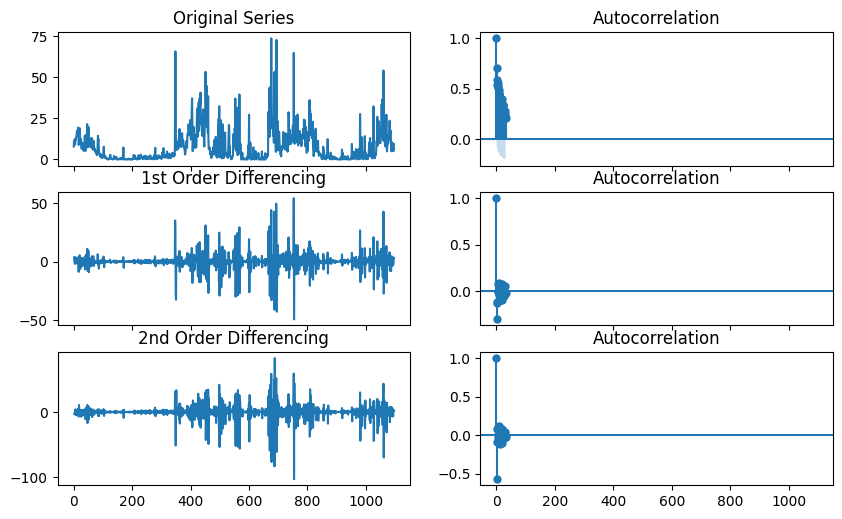

In [7]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data['ACTUAL RAINFALL (mm)']); axes[0, 0].set_title('Original Series')
plot_acf(data['ACTUAL RAINFALL (mm)'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data['ACTUAL RAINFALL (mm)'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['ACTUAL RAINFALL (mm)'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data['ACTUAL RAINFALL (mm)'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data['ACTUAL RAINFALL (mm)'].diff().diff().dropna(), ax=axes[2, 1])


plt.show()

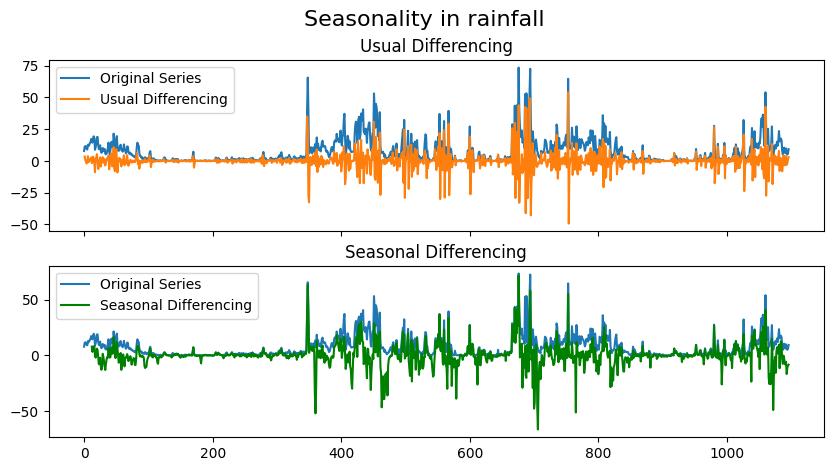

In [8]:
# Import

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data['ACTUAL RAINFALL (mm)'], label='Original Series')
axes[0].plot(data['ACTUAL RAINFALL (mm)'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data['ACTUAL RAINFALL (mm)'], label='Original Series')
axes[1].plot(data['ACTUAL RAINFALL (mm)'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Seasonality in rainfall', fontsize=16)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
df_differenced = np.log(data['ACTUAL RAINFALL (mm)'])
df_differenced = data['ACTUAL RAINFALL (mm)'].diff().dropna()
data = data.drop(data.index[0])
result = adfuller(df_differenced)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -10.772033943277988
p-value: 2.370789668451738e-19
Critical Values:
	1%: -3.436436308605049
	5%: -2.8642273405849363
	10%: -2.568200833956216


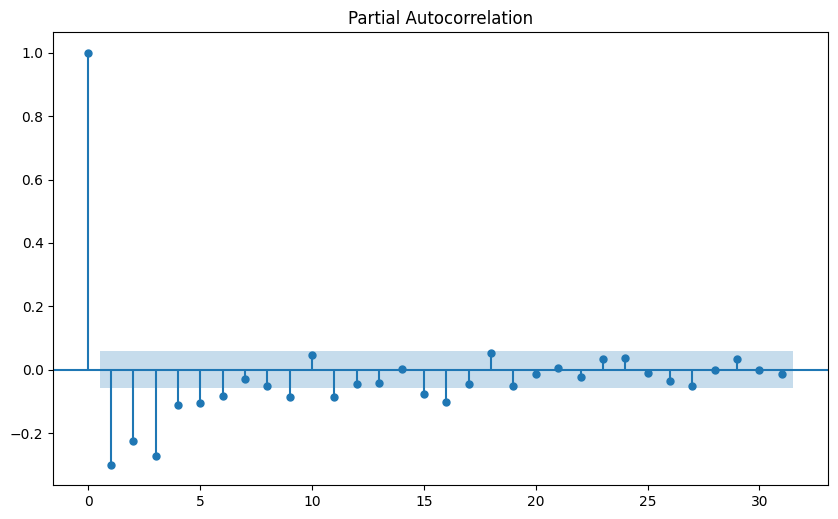

In [10]:
plot_pacf(df_differenced);

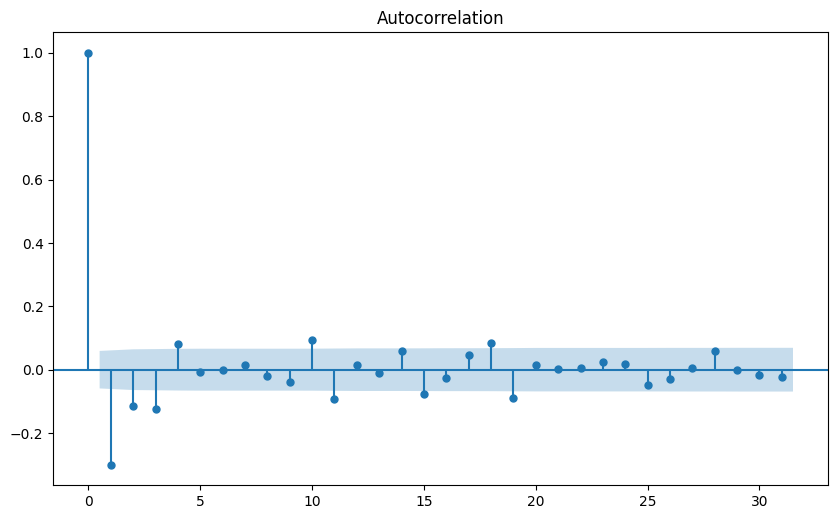

In [11]:
plot_acf(df_differenced);

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(data['ACTUAL RAINFALL (mm)'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=15, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7249.809, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7526.938, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7425.767, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7308.769, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7524.938, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7251.198, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7251.336, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7255.569, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7370.808, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7247.837, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7246.215, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7251.571, Time=0.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7240.808, Time=1.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7240.578, Time=0.62 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept

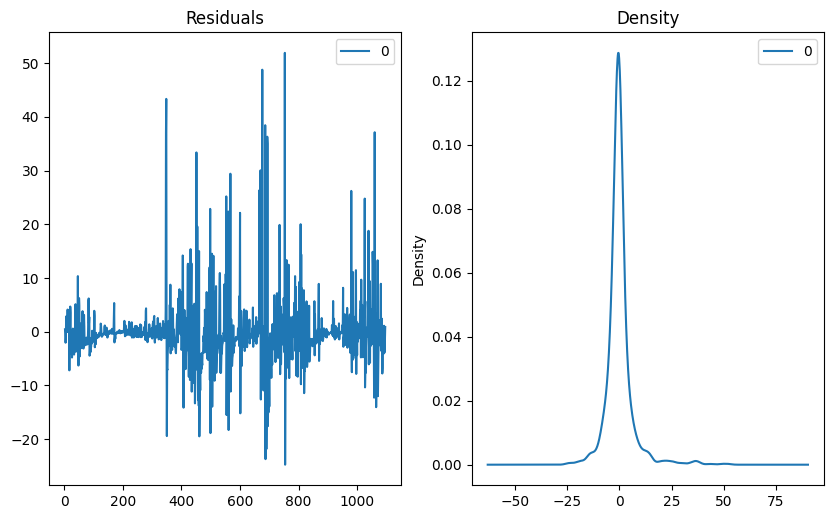

In [13]:
model = ARIMA(data['ACTUAL RAINFALL (mm)'], order=(4,1,1))
model_fit = model.fit(disp=0)
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

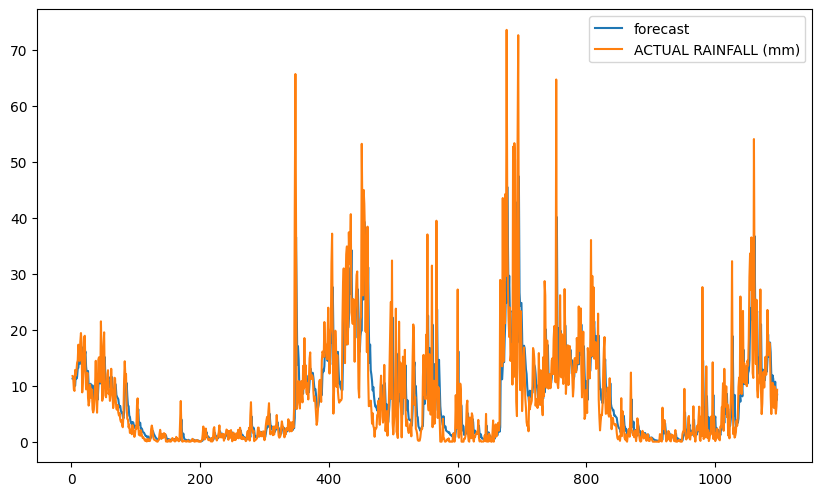

In [14]:
model_fit.plot_predict()
plt.show()

In [15]:
from statsmodels.tsa.stattools import acf

train = data['ACTUAL RAINFALL (mm)'][:850]
test = data['ACTUAL RAINFALL (mm)'][850:970]

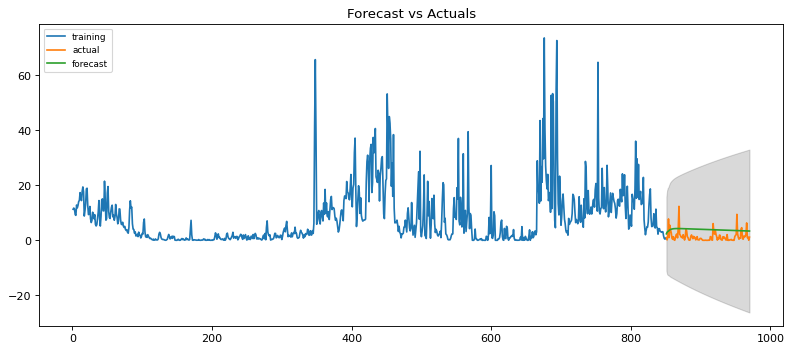

In [16]:
# Build Model using training data
model = ARIMA(train, order=(4, 1, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(120, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()